# Lab 1 Notebook
## Drew Harris, Drew Stewart, Alex Petmecky

# Filtering The Dataset 
The starting data was a little large at 21Mb so we used a simple javascript script to filter 1 out of every 30 lines. This brought us to about 5k lines and 694kb which was more managable. The data was ordered alphabetically by artist name, so picking an even distribution gave us an unbiased spread. 

```ts
const filename = Bun.argv[2];
console.log("Splitting filename", filename);

const file = Bun.file(filename);
const text = await file.text();
const lines = text.split("\n");

// Save every 30 lines
const filtered = lines.filter((_, i) => i % 30 === 0);
console.log("Filtered to", filtered.length, "lines");
const output = filtered.join("\n");

const outFilename = filename.replace(".csv", ".small.csv");

await Bun.write("./" + outFilename, output);
console.log("Wrote to", outFilename);
```

The dataset is on songs from Billboard during 1999-2019
The data is from spotify
## Prediction Task
We want to predict if a song has explicit language. Third parties might be interested in this data to filter out explicit songs from their playlists or add content warnings to their songs.

The prediction accuracy should be around 80-85% because it is important to be sure that we label songs accurately because a child might be listening to a song that is explicit and that would be bad. This is a situation where don't need to be 100% accurate because it isn't life or death.

Some of the songs are marked as instrumental so we will filter those out before our prediction. 

## Verify Data Quality
There are no missing values in the data set. The data is clean and ready to be used. If there were missing data attributed. If the data piece we are missing is relevant we will drop the row because we started with a very large dataset.

# Loading Data

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [116]:
df = pd.read_csv("data.csv")

<Axes: >

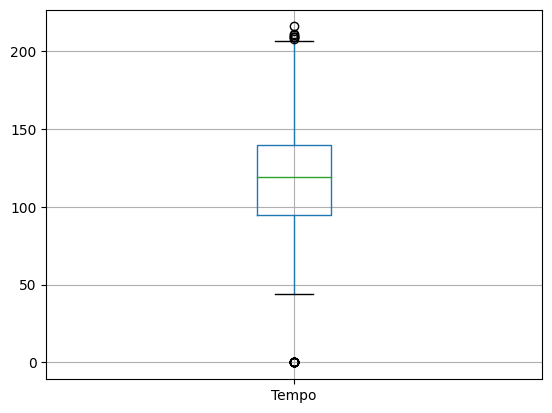

In [117]:
# Show 4 box plots in a row
df.boxplot(column="Tempo")

array([[<Axes: title={'center': 'Loudness'}>]], dtype=object)

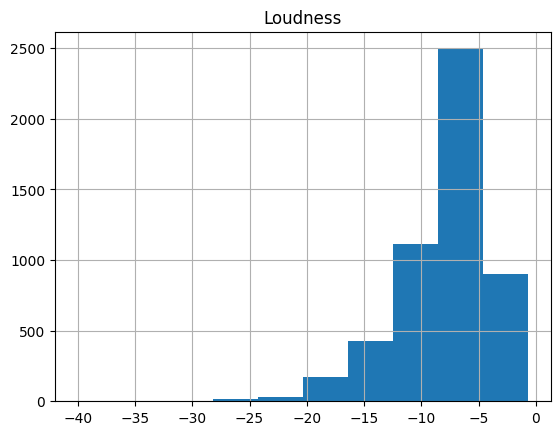

In [118]:
df.hist(column="Loudness")

Explicit
False    4069
True     1095
Name: count, dtype: int64

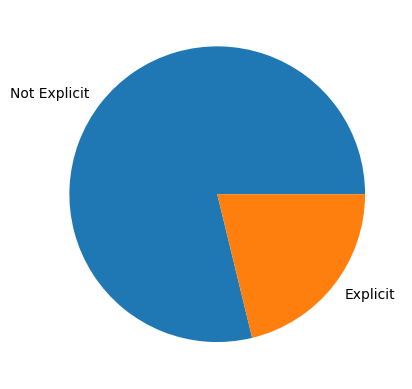

In [119]:
plt.pie(df["Explicit"].value_counts(), labels=["Not Explicit", "Explicit"])
# Show numbers
df["Explicit"].value_counts()

<Axes: ylabel='Density'>

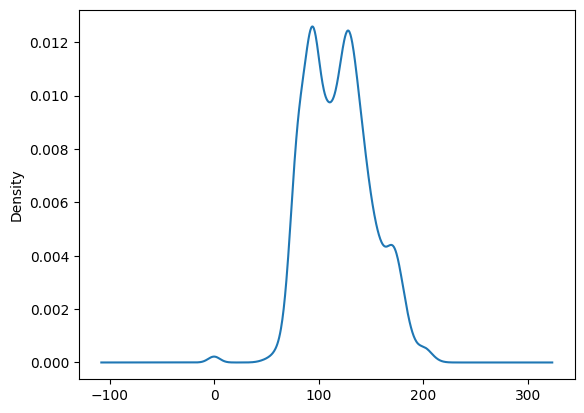

In [120]:
# Kernel density
df["Tempo"].plot.kde()

<BarContainer object of 2 artists>

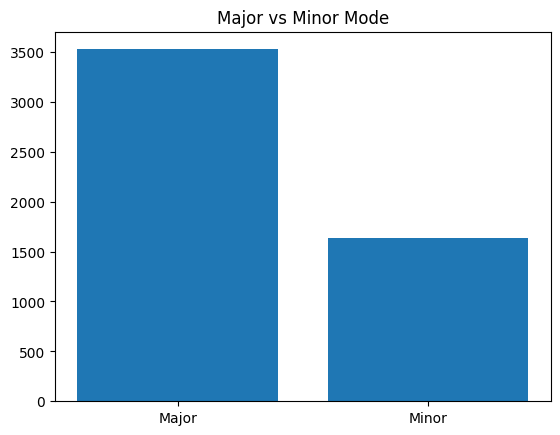

In [121]:
# Major vs minor mode bar chart
plt.title("Major vs Minor Mode")
plt.bar(["Major", "Minor"], df["Mode"].value_counts())

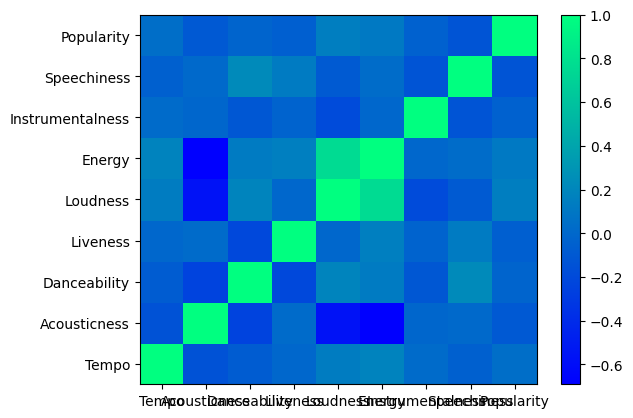

In [122]:
vars_to_use = ['Tempo', 'Acousticness', 'Danceability', 'Liveness', "Loudness", "Energy", "Instrumentalness", "Speechiness", "Popularity"]
# red to green
plt.pcolor(df[vars_to_use].corr(), cmap="winter")

plt.yticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.xticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)

plt.colorbar()

<Axes: xlabel='Explicit', ylabel='Speechiness'>

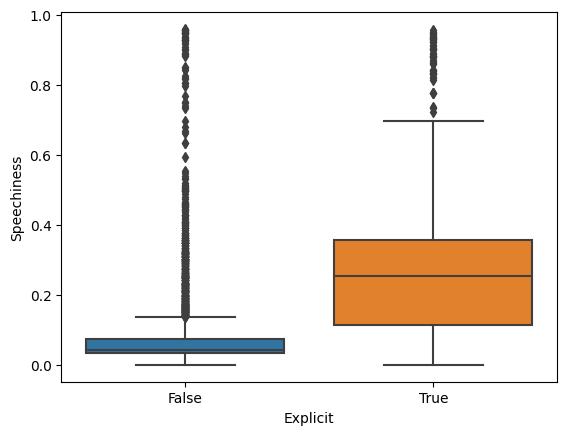

In [123]:
import seaborn as sns
sns.boxplot(x="Explicit", y="Speechiness", data=df)

<Axes: xlabel='Liveness', ylabel='Loudness'>

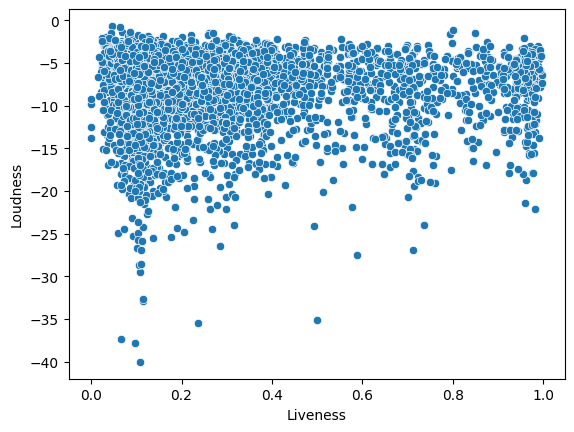

In [124]:
sns.scatterplot(x="Liveness", y="Loudness", data=df)